# ASSIGNMENT - 2
### MACHINE LEARNING
#### NAME: LOGARATHAN S V
#### ROLL: 2022503047

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [2]:
def train_perceptron(X, y, epochs=10000, lr=0.1):
    weights = np.random.randn(X.shape[1])
    print(weights)
    bias = np.random.randn(1)
    
    for _ in range(epochs):
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], weights) + bias
            y_pred = sigmoid(linear_output)
            error = y[i] - y_pred
            weights += lr * error * X[i] * sigmoid_derivative(y_pred)
            bias += lr * error * sigmoid_derivative(y_pred)
    
    return weights, bias

In [4]:
def plot_decision_boundary(X, y, weights, bias, title):
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]
    print("Values of w1: ", x1)
    print("Values of w2: ", x2)
    print("Values of y: ",y)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.plot(x1, x2, 'g')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(title)
    plt.show()

[-1.07127482 -2.87434345]
Values of w1:  [-0.5        -0.47979798 -0.45959596 -0.43939394 -0.41919192 -0.3989899
 -0.37878788 -0.35858586 -0.33838384 -0.31818182 -0.2979798  -0.27777778
 -0.25757576 -0.23737374 -0.21717172 -0.1969697  -0.17676768 -0.15656566
 -0.13636364 -0.11616162 -0.0959596  -0.07575758 -0.05555556 -0.03535354
 -0.01515152  0.00505051  0.02525253  0.04545455  0.06565657  0.08585859
  0.10606061  0.12626263  0.14646465  0.16666667  0.18686869  0.20707071
  0.22727273  0.24747475  0.26767677  0.28787879  0.30808081  0.32828283
  0.34848485  0.36868687  0.38888889  0.40909091  0.42929293  0.44949495
  0.46969697  0.48989899  0.51010101  0.53030303  0.55050505  0.57070707
  0.59090909  0.61111111  0.63131313  0.65151515  0.67171717  0.69191919
  0.71212121  0.73232323  0.75252525  0.77272727  0.79292929  0.81313131
  0.83333333  0.85353535  0.87373737  0.89393939  0.91414141  0.93434343
  0.95454545  0.97474747  0.99494949  1.01515152  1.03535354  1.05555556
  1.0757575

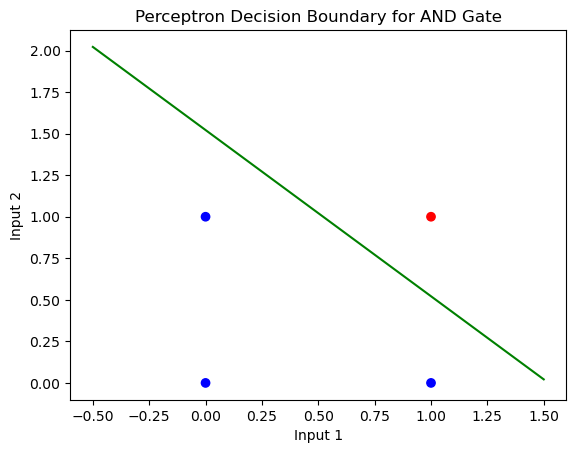

In [5]:
# AND Gate Data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Train perceptron on AND gate
weights_and, bias_and = train_perceptron(X_and, y_and)
plot_decision_boundary(X_and, y_and, weights_and, bias_and, "Perceptron Decision Boundary for AND Gate")

In [21]:
class MLP:
    def __init__(self):
        self.weights_input = np.random.randn(2, 2)
        self.weights_output = np.random.randn(2, 1)
        self.bias_hidden = np.random.randn(2)
        self.bias_output = np.random.randn(1)
    
    def train(self, X, y, epochs=10000, lr=0.1):
        for _ in range(epochs):
            hidden_layer = sigmoid(np.dot(X, self.weights_input) + self.bias_hidden)
            output_layer = sigmoid(np.dot(hidden_layer, self.weights_output) + self.bias_output)
            
            output_error = y - output_layer
            output_delta = output_error * sigmoid_derivative(output_layer)
            hidden_error = output_delta.dot(self.weights_output.T)
            hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)
            
            self.weights_output += hidden_layer.T.dot(output_delta) * lr
            self.bias_output += np.sum(output_delta, axis=0) * lr
            self.weights_input += X.T.dot(hidden_delta) * lr
            self.bias_hidden += np.sum(hidden_delta, axis=0) * lr
    
    def predict(self, X):
        hidden_layer = sigmoid(np.dot(X, self.weights_input) + self.bias_hidden)
        output_layer = sigmoid(np.dot(hidden_layer, self.weights_output) + self.bias_output)
        return (np.round(output_layer))

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
two_layer_perceptron = MLP()
two_layer_perceptron.train(X_xor, y_xor.reshape(-1, 1))
y_pred_mlp = two_layer_perceptron.predict(X_xor)
print("MLP Predictions for XOR:", y_pred_mlp.reshape(-1))

MLP Predictions for XOR: [0. 1. 1. 0.]


In [19]:
y_xor.reshape(-1)

array([0, 1, 1, 0])